💰 Revenue real esperado por precio:
Precio: $10 → Conversión: 35.0% → Revenue esperado: 3.50
Precio: $20 → Conversión: 28.0% → Revenue esperado: 5.60
Precio: $30 → Conversión: 20.0% → Revenue esperado: 6.00
Precio: $40 → Conversión: 12.0% → Revenue esperado: 4.80
Precio: $50 → Conversión: 5.0% → Revenue esperado: 2.50

✅ Total reward acumulado: 4920
🏆 Mejor precio real: 30


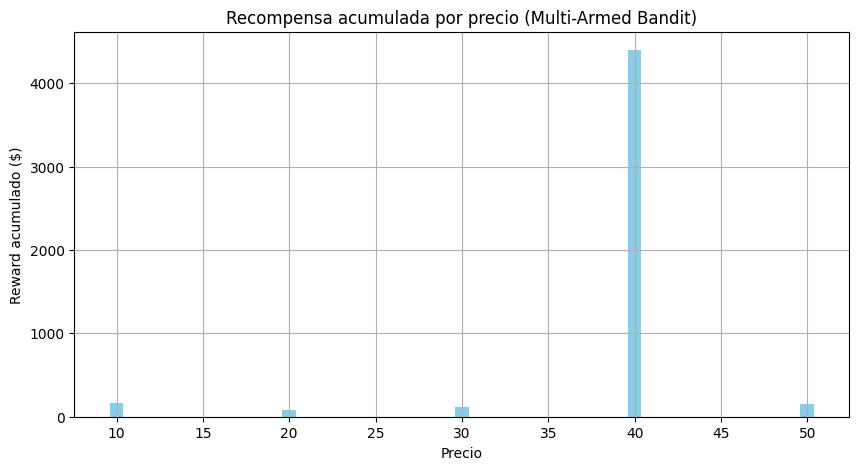

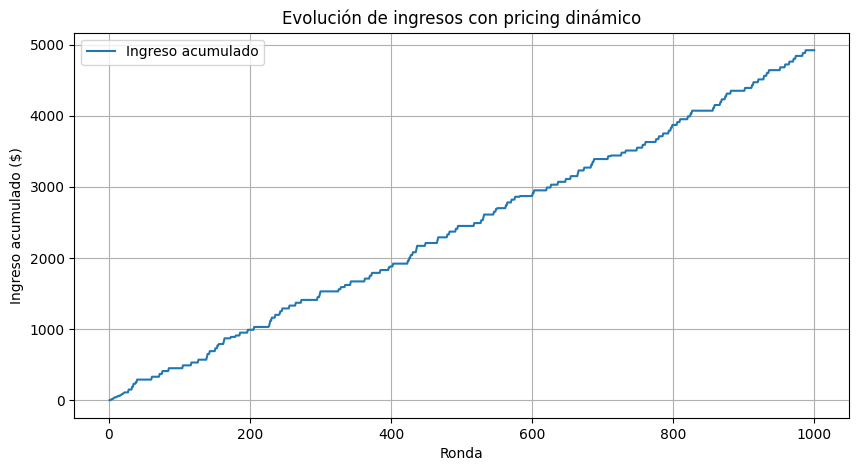


🎯 El agente eligió el precio óptimo en el 3.00% de los casos.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ========================
# 1️⃣ Simulación de entorno de venta
# ========================

np.random.seed(42)

# Precios disponibles
prices = np.array([10, 20, 30, 40, 50])
n_arms = len(prices)

# Tasa de conversión (simulada) decrece con el precio
true_conversion_rates = np.array([0.35, 0.28, 0.20, 0.12, 0.05])
true_revenues = prices * true_conversion_rates

print("💰 Revenue real esperado por precio:")
for i, p in enumerate(prices):
    print(f"Precio: ${p} → Conversión: {true_conversion_rates[i]*100:.1f}% → Revenue esperado: {true_revenues[i]:.2f}")

# ========================
# 2️⃣ Algoritmo RL: ε-greedy Multi-Armed Bandit
# ========================

n_rounds = 1000
epsilon = 0.1  # probabilidad de exploración
counts = np.zeros(n_arms)  # veces que se ha elegido cada brazo
rewards = np.zeros(n_arms)  # recompensa acumulada por brazo

history = {
    'round': [],
    'price': [],
    'conversion': [],
    'reward': [],
    'chosen_arm': [],
    'optimal_arm': []
}

for t in range(1, n_rounds + 1):
    if np.random.rand() < epsilon:
        arm = np.random.randint(n_arms)  # Explora
    else:
        arm = np.argmax(rewards / (counts + 1e-5))  # Explota

    price = prices[arm]
    conversion = np.random.rand() < true_conversion_rates[arm]
    reward = price if conversion else 0

    counts[arm] += 1
    rewards[arm] += reward

    optimal_arm = np.argmax(true_revenues)

    history['round'].append(t)
    history['price'].append(price)
    history['conversion'].append(int(conversion))
    history['reward'].append(reward)
    history['chosen_arm'].append(arm)
    history['optimal_arm'].append(optimal_arm)

# ========================
# 3️⃣ Análisis de resultados
# ========================

df = pd.DataFrame(history)

print("\n✅ Total reward acumulado:", df['reward'].sum())
print("🏆 Mejor precio real:", prices[np.argmax(true_revenues)])

# Gráfico: recompensas acumuladas por precio
plt.figure(figsize=(10, 5))
plt.bar(prices, rewards, color='skyblue')
plt.title("Recompensa acumulada por precio (Multi-Armed Bandit)")
plt.xlabel("Precio")
plt.ylabel("Reward acumulado ($)")
plt.grid(True)
plt.show()

# Gráfico: evolución de ingresos por ronda
df['cumulative_reward'] = df['reward'].cumsum()
plt.figure(figsize=(10, 5))
plt.plot(df['round'], df['cumulative_reward'], label='Ingreso acumulado')
plt.xlabel("Ronda")
plt.ylabel("Ingreso acumulado ($)")
plt.title("Evolución de ingresos con pricing dinámico")
plt.grid(True)
plt.legend()
plt.show()

# Porcentaje de veces que se elige el precio óptimo
optimal_choices = (df['chosen_arm'] == df['optimal_arm']).mean()
print(f"\n🎯 El agente eligió el precio óptimo en el {optimal_choices*100:.2f}% de los casos.")


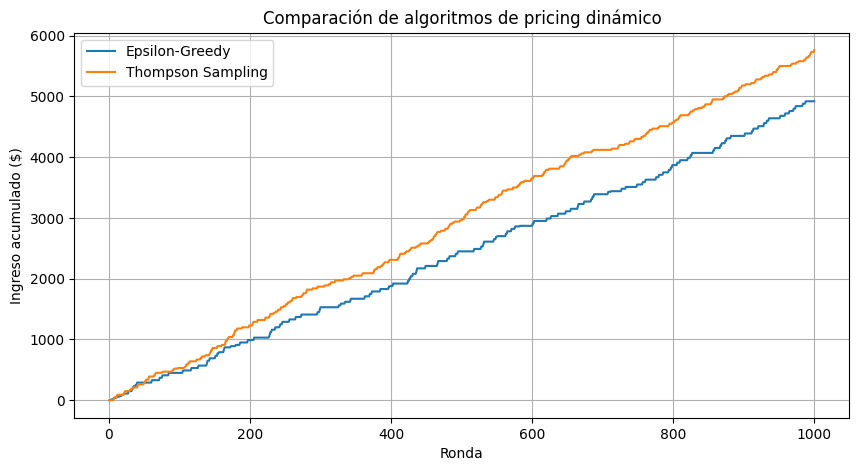


🤖 [Thompson Sampling] Ingreso total: $5760.00
🎯 Precio óptimo elegido en el 24.00% de las rondas


In [2]:
# ========================
# 🔁 4️⃣ Variante avanzada: Thompson Sampling
# ========================

from scipy.stats import beta

# Reiniciar historia
successes = np.zeros(n_arms)
failures = np.zeros(n_arms)
ts_history = {
    'round': [],
    'price': [],
    'conversion': [],
    'reward': [],
    'chosen_arm': [],
    'optimal_arm': []
}

for t in range(1, n_rounds + 1):
    samples = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(n_arms)]
    expected_values = samples * prices
    arm = np.argmax(expected_values)

    price = prices[arm]
    conversion = np.random.rand() < true_conversion_rates[arm]
    reward = price if conversion else 0

    if conversion:
        successes[arm] += 1
    else:
        failures[arm] += 1

    optimal_arm = np.argmax(true_revenues)

    ts_history['round'].append(t)
    ts_history['price'].append(price)
    ts_history['conversion'].append(int(conversion))
    ts_history['reward'].append(reward)
    ts_history['chosen_arm'].append(arm)
    ts_history['optimal_arm'].append(optimal_arm)

# Convertir a DataFrame
df_ts = pd.DataFrame(ts_history)
df_ts['cumulative_reward'] = df_ts['reward'].cumsum()

# ========================
# Visualización comparativa
# ========================
plt.figure(figsize=(10, 5))
plt.plot(df['round'], df['cumulative_reward'], label='Epsilon-Greedy')
plt.plot(df_ts['round'], df_ts['cumulative_reward'], label='Thompson Sampling')
plt.xlabel("Ronda")
plt.ylabel("Ingreso acumulado ($)")
plt.title("Comparación de algoritmos de pricing dinámico")
plt.legend()
plt.grid(True)
plt.show()

# Rendimiento de TS
ts_reward = df_ts['reward'].sum()
ts_optimal_choices = (df_ts['chosen_arm'] == df_ts['optimal_arm']).mean()
print(f"\n🤖 [Thompson Sampling] Ingreso total: ${ts_reward:.2f}")
print(f"🎯 Precio óptimo elegido en el {ts_optimal_choices*100:.2f}% de las rondas")
